In [286]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns


from datetime import timedelta

warnings.filterwarnings('ignore')
%matplotlib inline

In [287]:
def loading(path: str) -> pd.DataFrame:
    dataset = pd.read_csv(path)
    return dataset

In [288]:
def mapping(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])
    dataset['store_and_fwd_flag'] = dataset['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
    dataset.drop_duplicates(ignore_index=True, inplace=True)
    return dataset

In [289]:
train_df = loading('data/train.csv')

test_df = loading('data/test.csv')

In [290]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [291]:
train_df = mapping(train_df)

test_df = mapping(test_df)

In [292]:
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'])

In [293]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  int64         
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4), object(1)
memory usage: 122.4+ MB


In [294]:
correlation_df = train_df.drop(columns='id')

In [295]:
correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   pickup_datetime     1458644 non-null  datetime64[ns]
 2   dropoff_datetime    1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  int64         
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4)
memory usage: 111.3 MB


<Axes: >

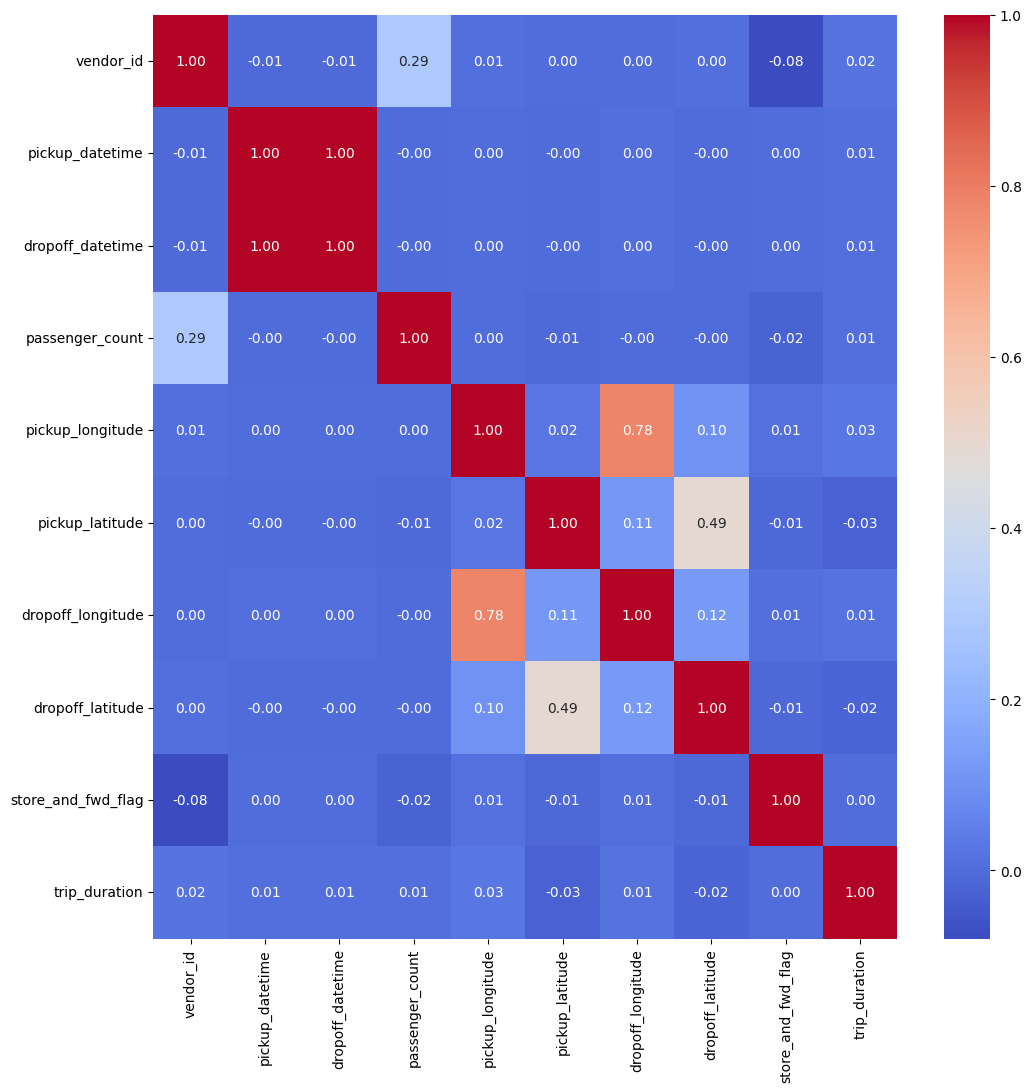

In [296]:
corr = correlation_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

In [297]:
train_df['pickup_longitude'].value_counts()

pickup_longitude
-73.982    633
-73.982    607
-73.982    587
-73.982    585
-73.982    584
          ... 
-73.815      1
-73.883      1
-73.845      1
-73.855      1
-73.841      1
Name: count, Length: 23047, dtype: int64

In [298]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644.000,1458644,1458644,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,2016-04-01 10:10:24.940037120,2016-04-01 10:26:24.432310528,1.665,-73.973,40.751,-73.973,40.752,0.006,959.492
min,1.000,2016-01-01 00:00:17,2016-01-01 00:03:31,0.000,-121.933,34.360,-121.933,32.181,0.000,1.000
25%,1.000,2016-02-17 16:46:04.249999872,2016-02-17 17:05:32.500000,1.000,-73.992,40.737,-73.991,40.736,0.000,397.000
50%,2.000,2016-04-01 17:19:40,2016-04-01 17:35:12,1.000,-73.982,40.754,-73.980,40.755,0.000,662.000
75%,2.000,2016-05-15 03:56:08.750000128,2016-05-15 04:10:51.750000128,2.000,-73.967,40.768,-73.963,40.770,0.000,1075.000
max,2.000,2016-06-30 23:59:39,2016-07-01 23:02:03,9.000,-61.336,51.881,-61.336,43.921,1.000,3526282.000
std,0.499,NaN,NaN,1.314,0.071,0.033,0.071,0.036,0.074,5237.432


In [299]:


train_df.trip_duration.describe()

count   1458644.000
mean        959.492
std        5237.432
min           1.000
25%         397.000
50%         662.000
75%        1075.000
max     3526282.000
Name: trip_duration, dtype: float64

In [300]:

print(np.percentile(train_df.trip_duration, 99)/60)
print(np.percentile(train_df.trip_duration, 99.5)/60)
print(np.percentile(train_df.trip_duration, 99.6)/60)
print(np.percentile(train_df.trip_duration, 99.8)/60)
print(np.percentile(train_df.trip_duration, 99.85)/60)
print(np.percentile(train_df.trip_duration, 99.9)/60)
print(np.percentile(train_df.trip_duration, 99.99)/60)
print(np.percentile(train_df.trip_duration, 99.999)/60)
print(np.percentile(train_df.trip_duration, 99.9999)/60)
print(train_df.trip_duration.max() / 60)

57.333333333333336
68.98333333333333
73.38333333333334
92.52856666666533
134.02494999999956
1418.8059500000013
1438.7833333333333
1439.4833333333333
35765.9658686484
58771.36666666667


In [301]:
print(len(train_df[train_df.trip_duration <= np.percentile(train_df.trip_duration, 99.9)]))
print(len(train_df[train_df.trip_duration <= np.percentile(train_df.trip_duration, 99.99)]))
print(len(train_df[train_df.trip_duration <= np.percentile(train_df.trip_duration, 99.999)]))

1457185
1458505
1458630


In [302]:
train_df = train_df[train_df.trip_duration < np.percentile(train_df.trip_duration, 99.85)]

In [303]:
train_df.trip_duration.describe()

count   1456456.000
mean        836.375
std         655.834
min           1.000
25%         397.000
50%         661.000
75%        1073.000
max        8041.000
Name: trip_duration, dtype: float64

Text(0.5, 1.0, 'Dropoff')

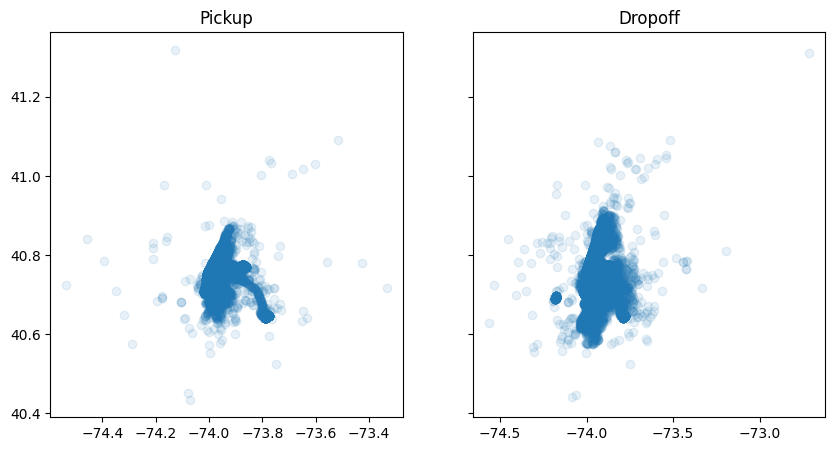

In [304]:
n = 100000 # number of data points to display
 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.scatter(train_df.pickup_longitude[:n], 
            train_df.pickup_latitude[:n],
            alpha = 0.1)
ax1.set_title('Pickup')
ax2.scatter(train_df.dropoff_longitude[:n], 
            train_df.dropoff_latitude[:n],
            alpha = 0.1)
ax2.set_title('Dropoff')

In [305]:
max_pickup_latitude = np.percentile(train_df.pickup_latitude, 99.999)
min_pickup_latitude = np.percentile(train_df.pickup_latitude, 0.001)
max_pickup_longitude = np.percentile(train_df.pickup_longitude, 99.999)
min_pickup_longitude = np.percentile(train_df.pickup_longitude, 0.001)
 
max_dropoff_latitude = np.percentile(train_df.dropoff_latitude, 99.999)
min_dropoff_latitude = np.percentile(train_df.dropoff_latitude, 0.001)
max_dropoff_longitude = np.percentile(train_df.dropoff_longitude, 99.999)
min_dropoff_longitude = np.percentile(train_df.dropoff_longitude, 0.001)

In [306]:
train_df = train_df[(train_df.pickup_latitude <= max_pickup_latitude) & (train_df.pickup_latitude >= min_pickup_latitude)]
train_df = train_df[(train_df.pickup_longitude <= max_pickup_longitude) & (train_df.pickup_longitude >= min_pickup_longitude)]
 
train_df = train_df[(train_df.dropoff_latitude <= max_dropoff_latitude) & (train_df.dropoff_latitude >= min_dropoff_latitude)]
train_df = train_df[(train_df.dropoff_longitude <= max_dropoff_longitude) & (train_df.dropoff_longitude >= min_dropoff_longitude)]

test_df = test_df[(test_df.pickup_latitude <= max_pickup_latitude) & (test_df.pickup_latitude >= min_pickup_latitude)]
test_df = test_df[(test_df.pickup_longitude <= max_pickup_longitude) & (test_df.pickup_longitude >= min_pickup_longitude)]
 
test_df = test_df[(test_df.dropoff_latitude <= max_dropoff_latitude) & (test_df.dropoff_latitude >= min_dropoff_latitude)]
test_df = test_df[(test_df.dropoff_longitude <= max_dropoff_longitude) & (test_df.dropoff_longitude >= min_dropoff_longitude)]

Text(0.5, 1.0, 'Dropoff')

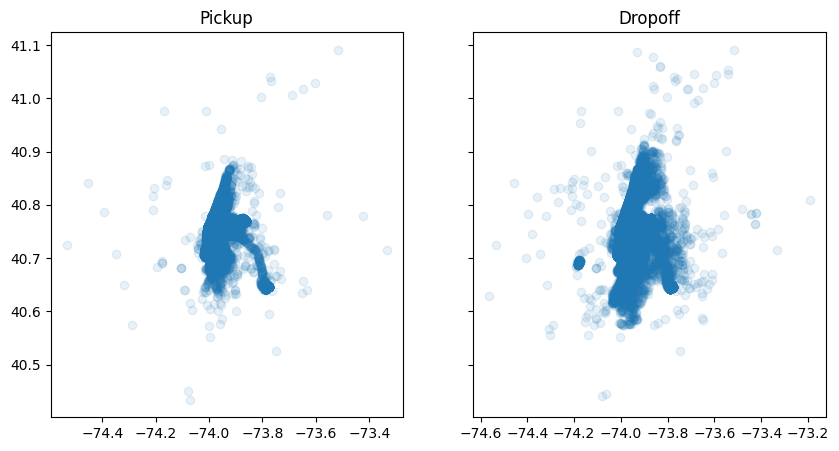

In [307]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.scatter(train_df.pickup_longitude[:n], 
            train_df.pickup_latitude[:n],
            alpha = 0.1)
ax1.set_title('Pickup')
ax2.scatter(train_df.dropoff_longitude[:n], 
            train_df.dropoff_latitude[:n],
            alpha = 0.1)
ax2.set_title('Dropoff')

In [308]:
con_df = pd.concat([train_df, test_df])

In [309]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2081522 entries, 0 to 625133
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  object        
 1   vendor_id           int64         
 2   pickup_datetime     datetime64[ns]
 3   dropoff_datetime    datetime64[ns]
 4   passenger_count     int64         
 5   pickup_longitude    float64       
 6   pickup_latitude     float64       
 7   dropoff_longitude   float64       
 8   dropoff_latitude    float64       
 9   store_and_fwd_flag  int64         
 10  trip_duration       float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(1)
memory usage: 190.6+ MB


In [310]:
con_df.isnull().sum()

id                         0
vendor_id                  0
pickup_datetime            0
dropoff_datetime      625113
passenger_count            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
store_and_fwd_flag         0
trip_duration         625113
dtype: int64

In [311]:
con_df = con_df.drop(columns=['dropoff_datetime'])

In [312]:
con_df.isnull().sum()

id                         0
vendor_id                  0
pickup_datetime            0
passenger_count            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
store_and_fwd_flag         0
trip_duration         625113
dtype: int64

In [313]:
con_df['pickup_minute_of_the_day'] = con_df.pickup_datetime.dt.hour*60 + con_df.pickup_datetime.dt.minute


In [314]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2081522 entries, 0 to 625133
Data columns (total 11 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   id                        object        
 1   vendor_id                 int64         
 2   pickup_datetime           datetime64[ns]
 3   passenger_count           int64         
 4   pickup_longitude          float64       
 5   pickup_latitude           float64       
 6   dropoff_longitude         float64       
 7   dropoff_latitude          float64       
 8   store_and_fwd_flag        int64         
 9   trip_duration             float64       
 10  pickup_minute_of_the_day  int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(3), object(1)
memory usage: 182.6+ MB


In [315]:
kmeans_pickup_time = KMeans(n_clusters=24, random_state=2).fit(con_df.pickup_minute_of_the_day[:500000].values.reshape(-1,1))
 
con_df['kmeans_pickup_time'] = kmeans_pickup_time.predict(con_df.pickup_minute_of_the_day.values.reshape(-1,1))

Text(0.5, 1.0, 'Pickup Hour')

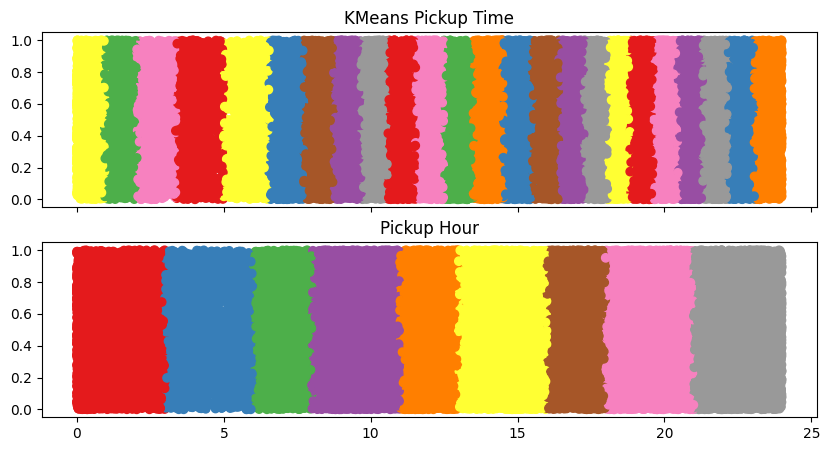

In [316]:

n = 50000 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5))
 
ax1.scatter(x = con_df.pickup_minute_of_the_day[:n]/60, 
            y = np.random.uniform(0,1, n), 
            cmap = 'Set1',
            c = con_df.kmeans_pickup_time[:n])
ax1.set_title('KMeans Pickup Time')
 
ax2.scatter(x = con_df.pickup_minute_of_the_day[:n]/60, 
            y = np.random.uniform(0,1, n), 
            cmap = 'Set1',
            c = con_df.pickup_datetime.dt.hour[:n])
ax2.set_title('Pickup Hour')

In [317]:

#calendar = USFederalHolidayCalendar()
#holidays = calendar.holidays() 

#us_bd = CustomBusinessDay(calendar = USFederalHolidayCalendar())

#work_days = pd.DatetimeIndex(start = con_df.pickup_datetime.min(), end = con_df.pickup_datetime.max(), freq = us_bd)
#work_days = pd.to_datetime(work_days).date

#con_df['pickup_month'] = con_df.pickup_datetime.dt.month
#con_df['pickup_weekday'] = con_df.pickup_datetime.dt.weekday
#con_df['pickup_is_weekend'] = con_df.pickup_weekday.map(lambda x: 1 if x >= 5 else 0)
#con_df['pickup_holiday'] = pd.to_datetime(con_df.pickup_datetime.dt.date).isin(holidays)
#con_df['pickup_holiday'] = con_df.pickup_holiday.map(lambda x: 1 if x == True else 0)

#con_df['pickup_near_holiday'] = (pd.to_datetime(con_df.pickup_datetime.dt.date).isin(holidays + timedelta(days=1))|pd.to_datetime(con_df.pickup_datetime.dt.date).isin(holidays - timedelta(days=1)))
#con_df['pickup_near_holiday'] = con_df.pickup_near_holiday.map(lambda x: 1 if x == True else 0)
#con_df['pickup_businessday'] = pd.to_datetime(con_df.pickup_datetime.dt.date).isin(work_days)
#con_df['pickup_businessday'] = con_df.pickup_businessday.map(lambda x: 1 if x == True else 0)

In [318]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456409 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1456409 non-null  object        
 1   vendor_id           1456409 non-null  int64         
 2   pickup_datetime     1456409 non-null  datetime64[ns]
 3   dropoff_datetime    1456409 non-null  datetime64[ns]
 4   passenger_count     1456409 non-null  int64         
 5   pickup_longitude    1456409 non-null  float64       
 6   pickup_latitude     1456409 non-null  float64       
 7   dropoff_longitude   1456409 non-null  float64       
 8   dropoff_latitude    1456409 non-null  float64       
 9   store_and_fwd_flag  1456409 non-null  int64         
 10  trip_duration       1456409 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4), object(1)
memory usage: 133.3+ MB


In [319]:
train_df['pickup_datetime'] = train_df['pickup_datetime'].apply(lambda x: x.timestamp())
train_df['pickup_datetime'] = train_df['pickup_datetime'].astype('float64')

train_df['dropoff_datetime'] = train_df['dropoff_datetime'].apply(lambda x: x.timestamp())
train_df['dropoff_datetime'] = train_df['dropoff_datetime'].astype('float64')

test_df['pickup_datetime'] = test_df['pickup_datetime'].apply(lambda x: x.timestamp())
test_df['pickup_datetime'] = test_df['pickup_datetime'].astype('float64')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625113 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625113 non-null  object 
 1   vendor_id           625113 non-null  int64  
 2   pickup_datetime     625113 non-null  float64
 3   passenger_count     625113 non-null  int64  
 4   pickup_longitude    625113 non-null  float64
 5   pickup_latitude     625113 non-null  float64
 6   dropoff_longitude   625113 non-null  float64
 7   dropoff_latitude    625113 non-null  float64
 8   store_and_fwd_flag  625113 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 47.7+ MB


In [320]:
train_df = train_df.drop(columns=['id', 'dropoff_datetime'])
train_df['vendor_id'] = train_df['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
train_df['store_and_fwd_flag'] = train_df['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

In [321]:
train_df['trip_duration_log'] = np.log(train_df['trip_duration']+1)

In [322]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import Normalizer

In [323]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456409 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1456409 non-null  int64  
 1   pickup_datetime     1456409 non-null  float64
 2   passenger_count     1456409 non-null  int64  
 3   pickup_longitude    1456409 non-null  float64
 4   pickup_latitude     1456409 non-null  float64
 5   dropoff_longitude   1456409 non-null  float64
 6   dropoff_latitude    1456409 non-null  float64
 7   store_and_fwd_flag  1456409 non-null  int64  
 8   trip_duration       1456409 non-null  int64  
 9   trip_duration_log   1456409 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 122.2 MB


In [324]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625113 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625113 non-null  object 
 1   vendor_id           625113 non-null  int64  
 2   pickup_datetime     625113 non-null  float64
 3   passenger_count     625113 non-null  int64  
 4   pickup_longitude    625113 non-null  float64
 5   pickup_latitude     625113 non-null  float64
 6   dropoff_longitude   625113 non-null  float64
 7   dropoff_latitude    625113 non-null  float64
 8   store_and_fwd_flag  625113 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 47.7+ MB


In [325]:
X_train = train_df.drop(['trip_duration', 'trip_duration_log'], axis=1)
y_train = train_df['trip_duration']

X_test = test_df.drop(['id'], axis=1)

In [326]:
transformer_train = Normalizer().fit(X_train)

transformer_test = Normalizer().fit(X_test)

In [327]:
X_train = transformer_train.transform(X_train)

X_test = transformer_test.transform(X_test)

In [328]:
X_train = pd.DataFrame(X_train)

X_test = pd.DataFrame(X_test)

In [329]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625113 entries, 0 to 625112
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       625113 non-null  float64
 1   1       625113 non-null  float64
 2   2       625113 non-null  float64
 3   3       625113 non-null  float64
 4   4       625113 non-null  float64
 5   5       625113 non-null  float64
 6   6       625113 non-null  float64
 7   7       625113 non-null  float64
dtypes: float64(8)
memory usage: 38.2 MB


In [330]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred_lin_reg = linear_regression_model.predict(X_test)


In [331]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression().fit(X_train_poly, y_train)
y_valid_pred_log_poly1 = poly_reg.predict(X_test_poly)

In [332]:
ridge_poly_reg = Ridge(alpha=1)

# Обучаем модель
ridge_poly_reg.fit(X_train_poly, y_train)
y_valid_pred_log_poly2 = ridge_poly_reg.predict(X_test_poly)

In [340]:
submission = pd.DataFrame({'id': test_df['id'], 'trip_duration': y_valid_pred_log_poly1})
submission.to_csv('submission.csv', index=False)

In [335]:
y_valid_pred_log_poly = pd.DataFrame(y_valid_pred_log_poly2)

In [336]:
y_valid_pred_log_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625113 entries, 0 to 625112
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       625113 non-null  float64
dtypes: float64(1)
memory usage: 4.8 MB


In [337]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625113 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625113 non-null  object 
 1   vendor_id           625113 non-null  int64  
 2   pickup_datetime     625113 non-null  float64
 3   passenger_count     625113 non-null  int64  
 4   pickup_longitude    625113 non-null  float64
 5   pickup_latitude     625113 non-null  float64
 6   dropoff_longitude   625113 non-null  float64
 7   dropoff_latitude    625113 non-null  float64
 8   store_and_fwd_flag  625113 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 47.7+ MB
